## Analysis of Data on  Twitter

#### Purpose: In this assignment work, I want to use data from Twitter to do data visualization.

To find data of myself, firstly I need to connect to the Twitter API for data collecting. The Twitter API has limitation of time and value of tweets you got, so I need to write the codes to use Tweepy Stream and let the computer running for around one week to get the data.

So in the first part, I use Twitter data I found from the Internet to do some analysis and data visualization. And in the second part I use the data I collected from Twitter API to do the mapping of tweets.


In [1]:
import sklearn
import matplotlib.pyplot as plt

import pandas as pd
from sklearn.cross_validation import train_test_split
import numpy as np
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud,STOPWORDS
from collections import Counter

/Users/xiaochen/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)



### 1.The first part
The data I use in this part is the tweets about different airlines collected from the Internet, including people's sentiment about the airlines.

In [2]:
tweet_csv="/Users/xiaochen/Desktop/elements module/code & data -twitter 02/Tweets.csv"
tweets= pd.read_csv("/Users/xiaochen/Desktop/elements module/code & data -twitter 02/Tweets.csv")
tweets.head(10)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)
5,570300767074181121,negative,1.0000,Can't Tell,0.6842,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica seriously would pay $30 a fligh...,NaN,2015-02-24 11:14:33 -0800,NaN,Pacific Time (US & Canada)
6,570300616901320704,positive,0.6745,NaN,0.0000,Virgin America,NaN,cjmcginnis,NaN,0,"@VirginAmerica yes, nearly every time I fly VX...",NaN,2015-02-24 11:13:57 -0800,San Francisco CA,Pacific Time (US & Canada)
7,570300248553349120,neutral,0.6340,NaN,NaN,Virgin America,NaN,pilot,NaN,0,@VirginAmerica Really missed a prime opportuni...,NaN,2015-02-24 11:12:29 -0800,Los Angeles,Pacific Time (US & Canada)
8,570299953286942721,positive,0.6559,NaN,NaN,Virgin America,NaN,dhepburn,NaN,0,"@virginamerica Well, I didn't…but NOW I DO! :-D",NaN,2015-02-24 11:11:19 -0800,San Diego,Pacific Time (US & Canada)
9,570295459631263746,positive,1.0000,NaN,NaN,Virgin America,NaN,YupitsTate,NaN,0,"@VirginAmerica it was amazing, and arrived an ...",NaN,2015-02-24 10:53:27 -0800,Los Angeles,Eastern Time (US & Canada)


In [3]:
tweets.shape

(14640, 15)

In [4]:
#columns of the dataframe

tweets.columns

Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')

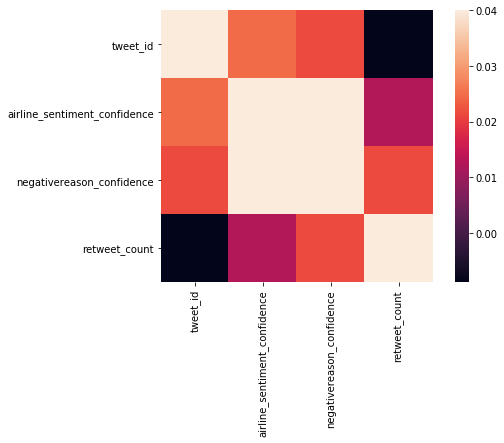

In [14]:
#the  heatmap is the best way to get a quick overview of our data columns


corrmat = tweets.corr()
f, ax = plt.subplots(figsize=(8, 5))
sns.heatmap(corrmat, vmax=0.04, square=True);

plt.show()

In [15]:
#find the words frency in the tweets text
#firstly I need to replace the useless information(like , ; : -.....) by using sportwords

top_N = 30
stopwords = nltk.corpus.stopwords.words('english')
RE_stopwords = r'\b(?:{})\b'.format('|'.join(stopwords))
words = (tweets['text']
           .str.lower()
           .replace([r'\|', RE_stopwords, r"(&amp)|,|;|\"|\.|\?|’|!|'|:|-|\\|/|https"], [' ', ' ', ' '], regex=True)
           .str.cat(sep=' ')
           .split()
)

frequency = pd.DataFrame(Counter(words).most_common(top_N),
                    columns=['Word', 'Frequency']).set_index('Word')

frequency = frequency.iloc[1:]

frequency

,Frequency
Word,
@united,3866
@usairways,2985
@americanair,2942
@southwestair,2443
@jetblue,2140
get,1340
co,1214
http,1155
thanks,1076


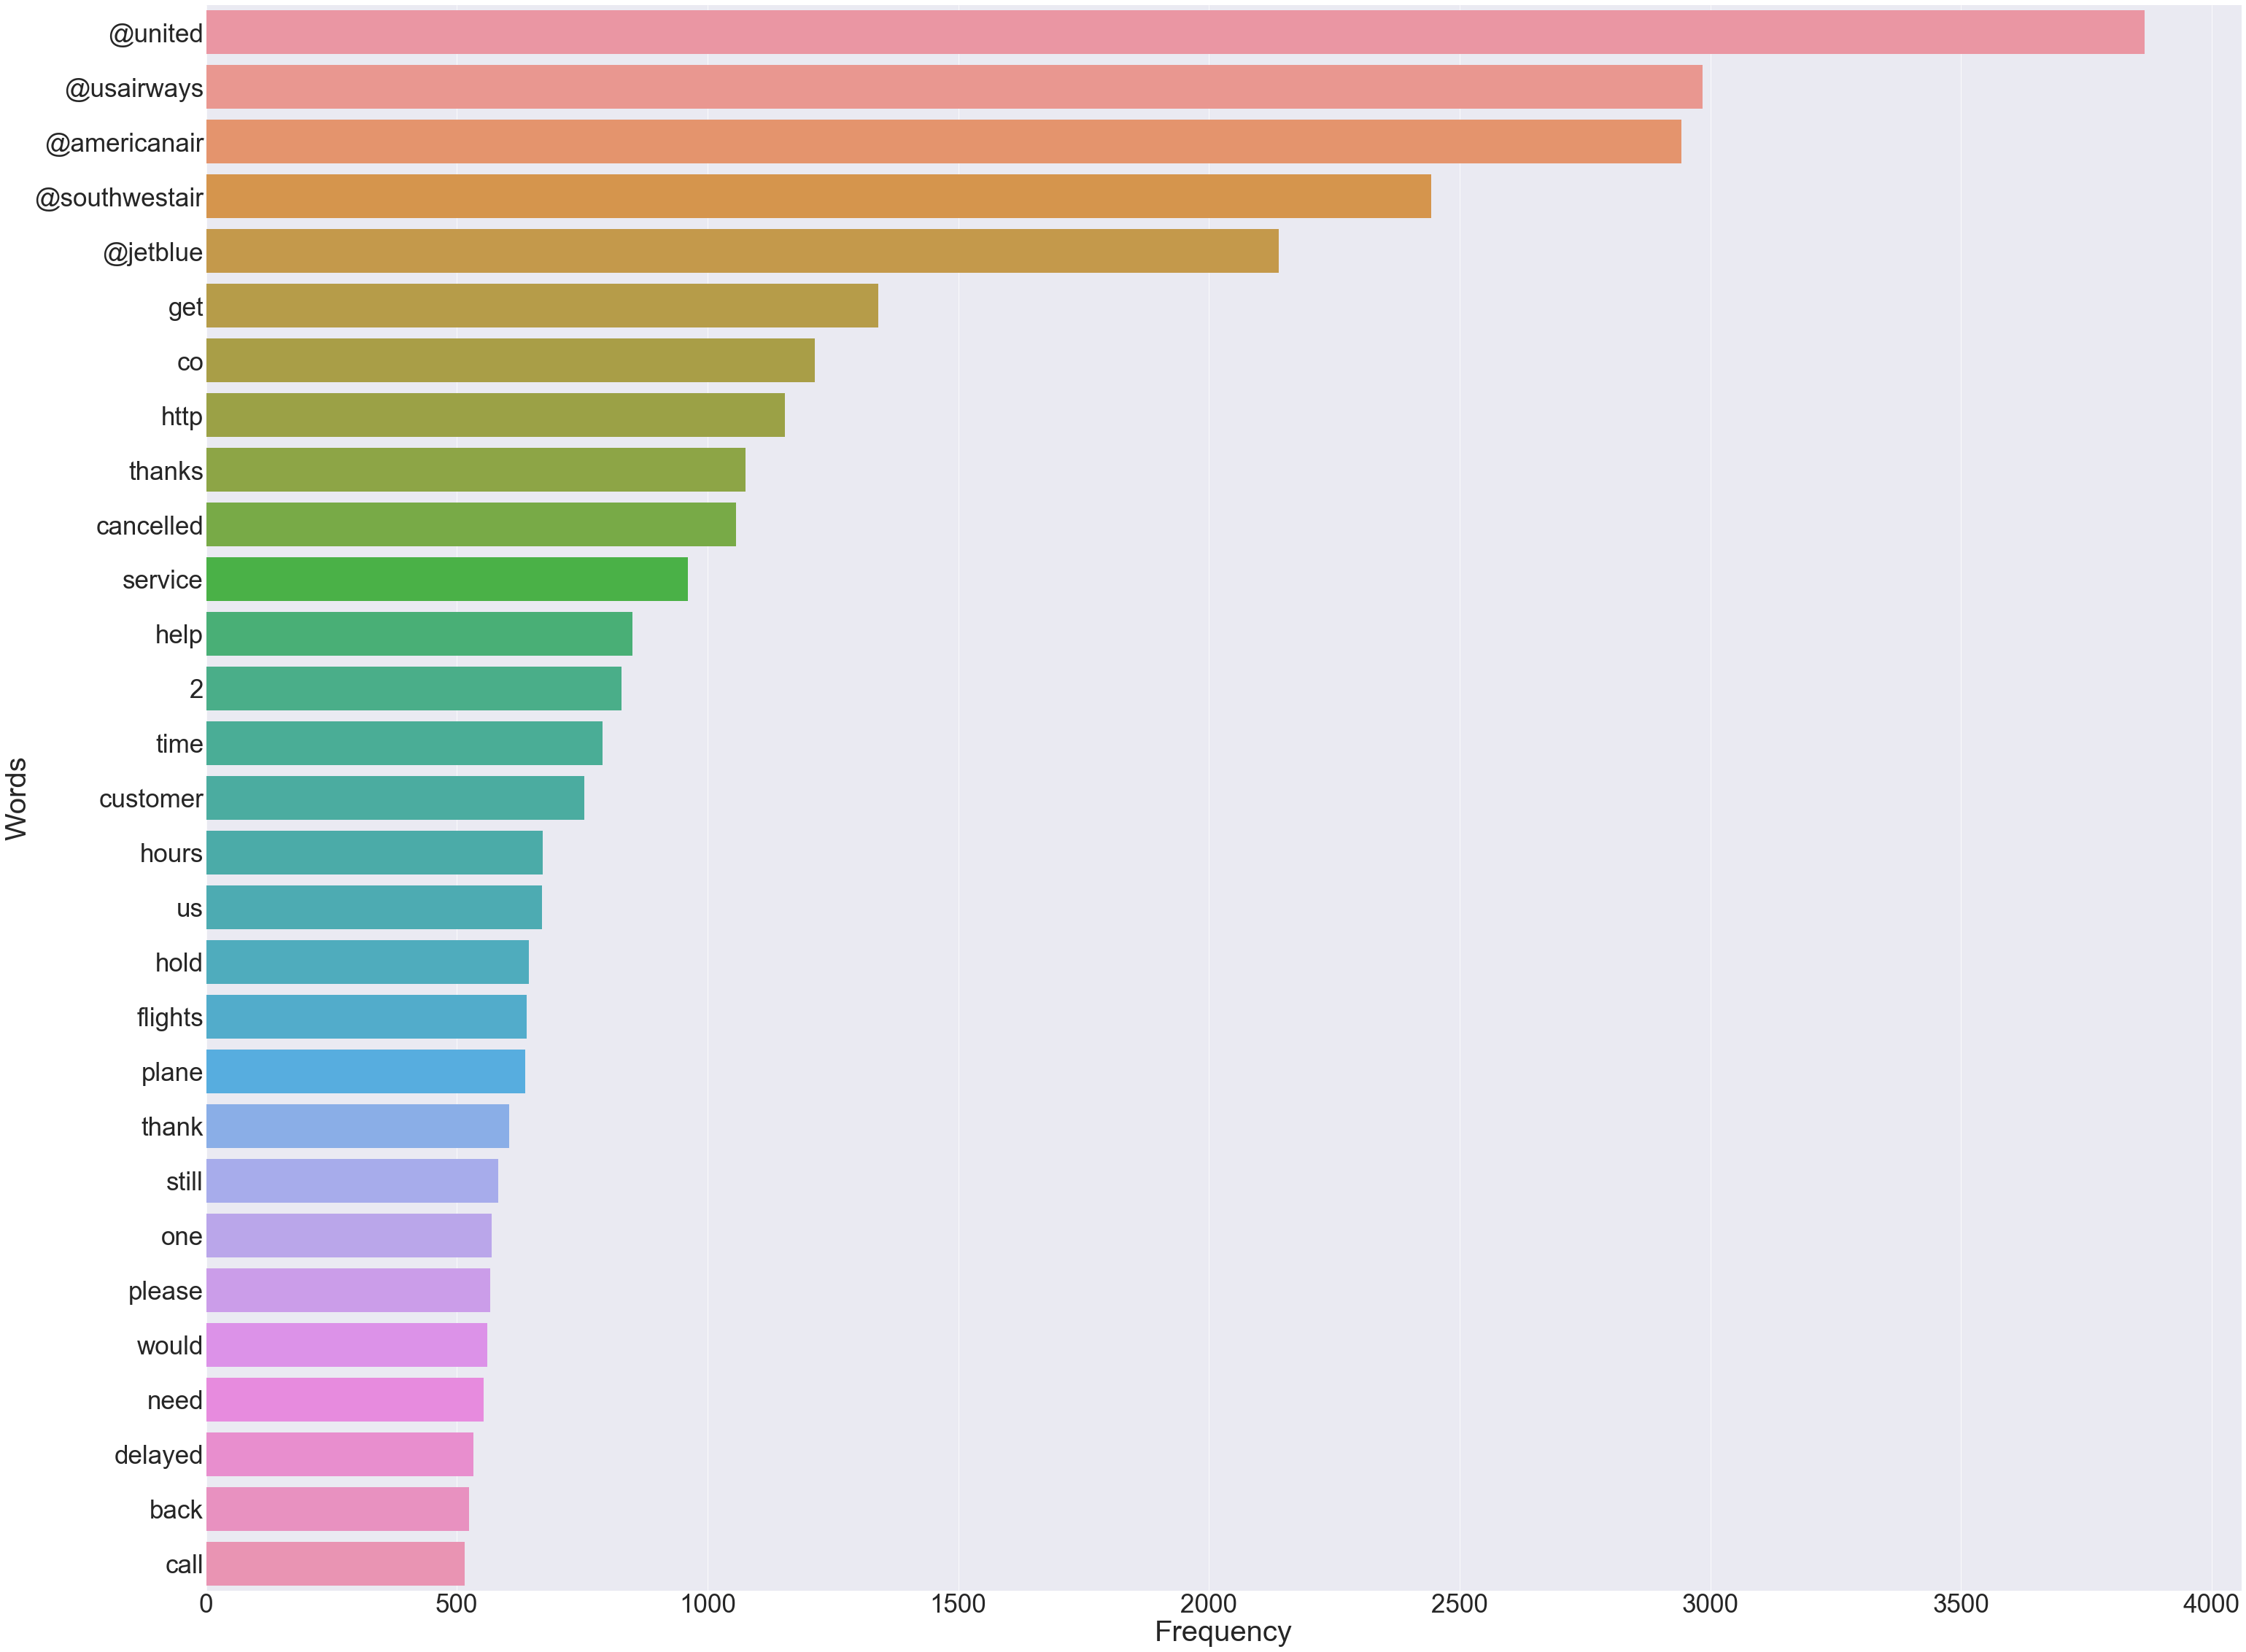

In [16]:
#the plot of words frequency


sns.set_style("darkgrid")
plt.rcParams["figure.figsize"] = [50.0, 40.0]
ax = sns.barplot(y=frequency.index, x='Frequency', data=frequency)
ax.set_xlabel("Frequency",fontsize=40)
ax.set_ylabel("Words",fontsize=40)
ax.tick_params(labelsize=35)

plt.show()

In [17]:
# find out the user's timezone

tags = (tweets['user_timezone']
           .str.lower()
           .str.cat(sep=' ')
           .split()
)

frequency_timezone = pd.DataFrame(Counter(tags).most_common(30),
                    columns=['user_timezone', 'Frequency']).set_index('user_timezone')
frequency_timezone = frequency_timezone.iloc[1:]


frequency_timezone

,Frequency
user_timezone,
(us,7252
&,7252
canada),7252
eastern,3744
central,1945
pacific,1208
quito,738
atlantic,497
(canada),497


In [18]:
# drop the useless row of '&'

frequency_timezone = frequency_timezone.drop('&')


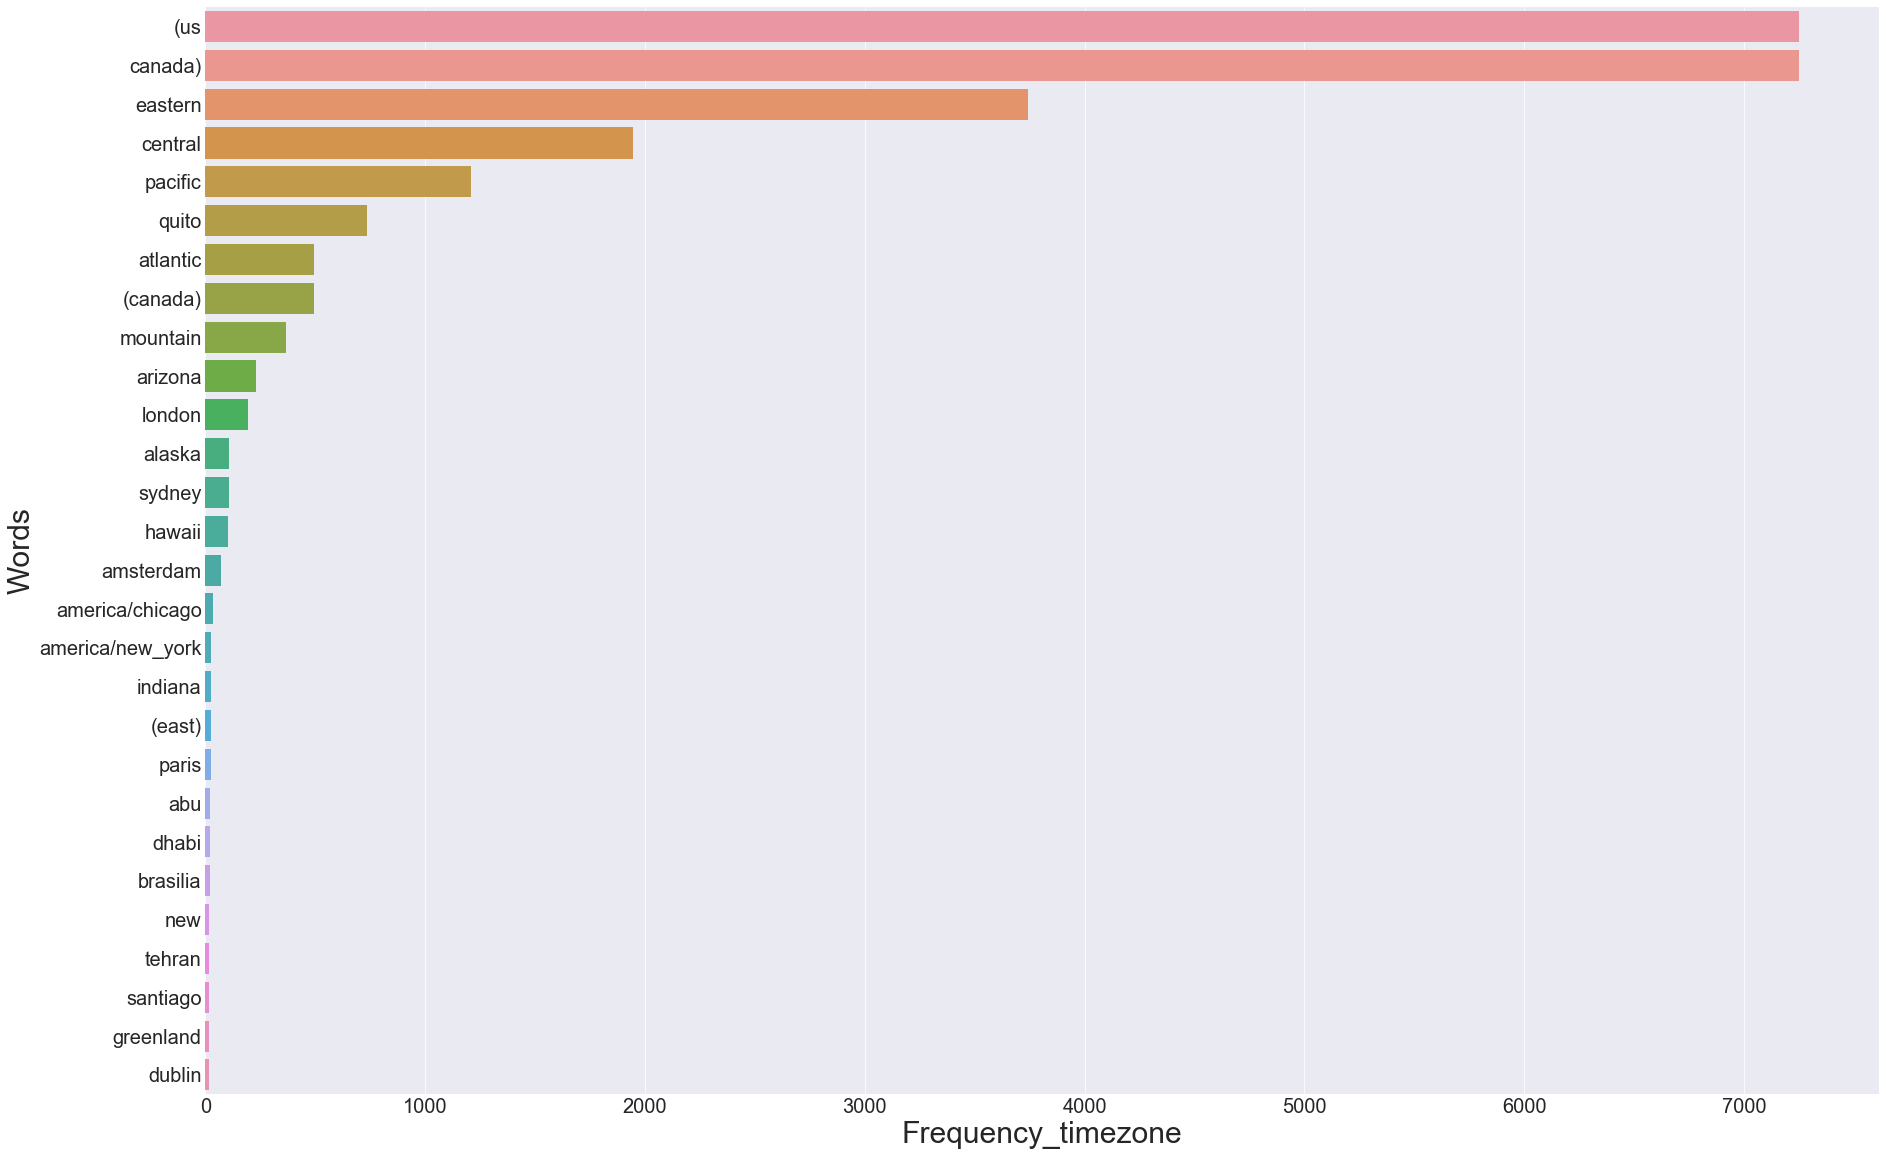

In [19]:
sns.set_style("darkgrid")
plt.rcParams["figure.figsize"] = [30.0, 20.0]
ax = sns.barplot(y=frequency_timezone.index, x='Frequency', data=frequency_timezone)
ax.set_xlabel("Frequency_timezone",fontsize=30)
ax.set_ylabel("Words",fontsize=30)
ax.tick_params(labelsize=20)

plt.show()

# most of the tweets are from US and Canada

In [20]:
#counting the number of tweets each airlines has received 
tweets.airline.value_counts()

United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: airline, dtype: int64

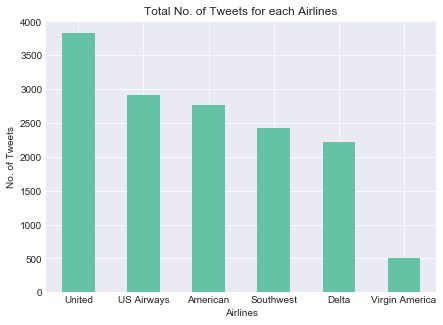

In [21]:
#Plotting the number of tweets each airlines has received
colors=sns.color_palette("Set2", 10)
pd.Series(tweets["airline"]).value_counts().plot(kind = "bar",
                        color=colors,figsize=(7,5),fontsize=10,rot = 0, title = "Total No. of Tweets for each Airlines")
plt.xlabel('Airlines', fontsize=10)
plt.ylabel('No. of Tweets', fontsize=10)

plt.show()

In [22]:
# the total sentiment received

tweets.airline_sentiment.value_counts()

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

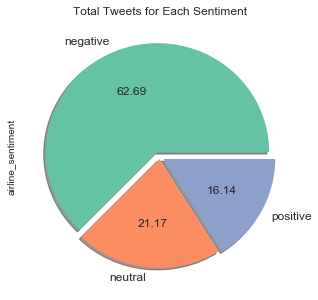

In [23]:

colors=sns.color_palette("Set2", 10)
pd.Series(tweets["airline_sentiment"]).value_counts().plot(kind="pie",colors=colors,
    labels=["negative", "neutral", "positive"],explode=[0.05,0.02,0.04],
    shadow=True,autopct='%.2f', fontsize=12,figsize=(5, 5),title = "Total Tweets for Each Sentiment")

plt.show()

#Plot of the number of each type of sentiments 
# most of the sentiments are negative

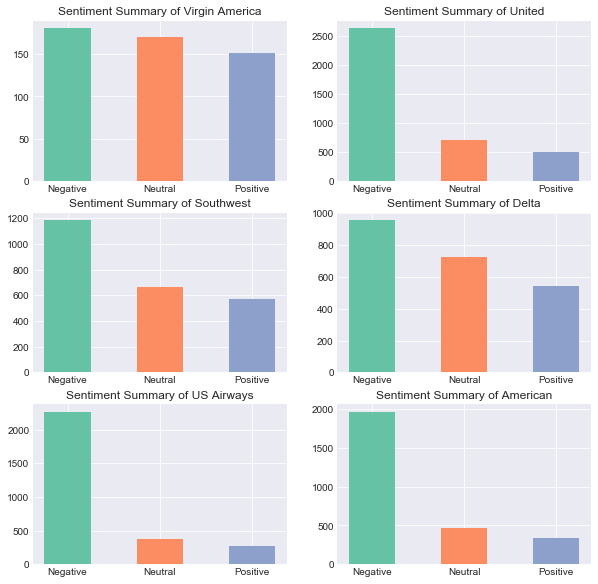

In [24]:
def plot_sub_sentiment(Airline):
    
    colors=sns.color_palette("Set2", 10)
    pdf = tweets[tweets['airline']==Airline]
    count = pdf['airline_sentiment'].value_counts()
    Index = [1,2,3]
    color=sns.color_palette("husl", 10)
    plt.bar(Index,count,width=0.5,color=colors)
    plt.xticks(Index,['Negative','Neutral','Positive'])
    plt.title('Sentiment Summary of' + " " + Airline)

airline_name = tweets['airline'].unique()
plt.figure(1,figsize=(10,10))
for i in range(6):
    plt.subplot(3,2,i+1)
    plot_sub_sentiment(airline_name[i])
    
plt.show()

# Plot of the sentiments of each airline 
# see the differents abou different airlines

In [25]:
#counting the total number of negative reasons
tweets.negativereason.value_counts()

Customer Service Issue         2910
Late Flight                    1665
Can't Tell                     1190
Cancelled Flight                847
Lost Luggage                    724
Bad Flight                      580
Flight Booking Problems         529
Flight Attendant Complaints     481
longlines                       178
Damaged Luggage                  74
Name: negativereason, dtype: int64

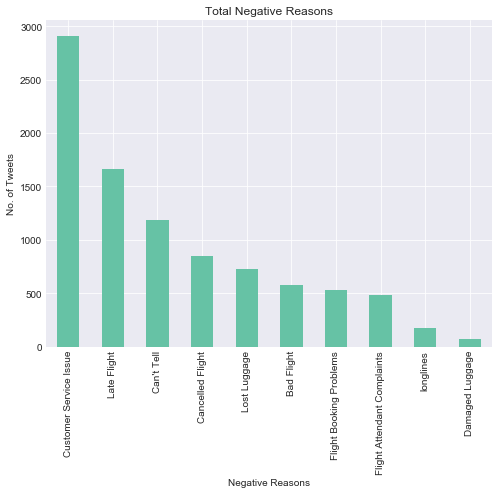

In [26]:

colors=sns.color_palette("Set2", 10)
pd.Series(tweets["negativereason"]).value_counts().plot(kind = "bar",
                        color=colors,figsize=(8,6),title = "Total Negative Reasons")
plt.xlabel('Negative Reasons', fontsize=10)
plt.ylabel('No. of Tweets', fontsize=10)

plt.show()

# plot of all the negative reasons 
# the most common negative reason is customer service issue

In [27]:
# figure the percentsge of satisfaction of each airline

air_senti=pd.crosstab(tweets.airline, tweets.airline_sentiment)
air_senti

airline_sentiment,negative,neutral,positive
airline,,,
American,1960,463,336
Delta,955,723,544
Southwest,1186,664,570
US Airways,2263,381,269
United,2633,697,492
Virgin America,181,171,152


In [28]:
percent=air_senti.apply(lambda a: a / a.sum() * 100, axis=1)
percent

airline_sentiment,negative,neutral,positive
airline,,,
American,71.040232,16.781443,12.178325
Delta,42.979298,32.538254,24.482448
Southwest,49.008264,27.438017,23.553719
US Airways,77.686234,13.079300,9.234466
United,68.890633,18.236525,12.872841
Virgin America,35.912698,33.928571,30.158730


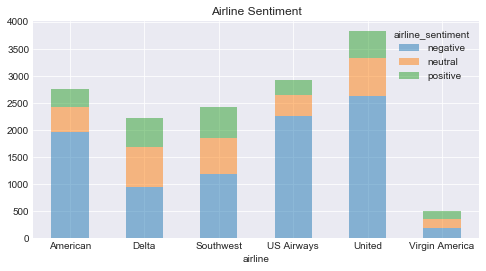

In [29]:
# polt of the percentsge of satisfaction of each airline 

pd.crosstab(index = tweets["airline"],columns = tweets["airline_sentiment"]).plot(kind='bar',
                figsize=(8, 4),alpha=0.5,rot=0,stacked=True,title="Airline Sentiment")

plt.show()

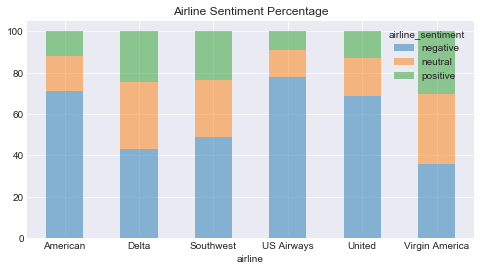

In [30]:

percent.plot(kind='bar',figsize=(8, 4),alpha=0.5,
                rot=0,stacked=True,title="Airline Sentiment Percentage")

plt.show()

In [31]:
# the next step I want to show the distribution of tweets by day of week for each airline (color), and sentiments 
# firstly I  show a few columns of the created dataframe as a table.

import datetime as dt


parser = lambda x: dt.datetime.strptime(x[:-6], '%Y-%m-%d %H:%M:%S')
tweets = pd.read_csv(tweet_csv, index_col = 'tweet_id',
                     parse_dates=[12], date_parser = parser)
pd.options.display.max_rows = 8
tweets[['airline_sentiment','airline', 'retweet_count', 
        'text', 'tweet_created']]

,airline_sentiment,airline,retweet_count,text,tweet_created
tweet_id,,,,,
570306133677760513,neutral,Virgin America,0,@VirginAmerica What @dhepburn said.,2015-02-24 11:35:52
570301130888122368,positive,Virgin America,0,@VirginAmerica plus you've added commercials t...,2015-02-24 11:15:59
570301083672813571,neutral,Virgin America,0,@VirginAmerica I didn't today... Must mean I n...,2015-02-24 11:15:48
570301031407624196,negative,Virgin America,0,@VirginAmerica it's really aggressive to blast...,2015-02-24 11:15:36
...,...,...,...,...,...
569587371693355008,negative,American,0,@AmericanAir leaving over 20 minutes Late Flig...,2015-02-22 11:59:46
569587242672398336,neutral,American,0,@AmericanAir Please bring American Airlines to...,2015-02-22 11:59:15
569587188687634433,negative,American,0,"@AmericanAir you have my money, you change my ...",2015-02-22 11:59:02
569587140490866689,neutral,American,0,@AmericanAir we have 8 ppl so we need 2 know h...,2015-02-22 11:58:51


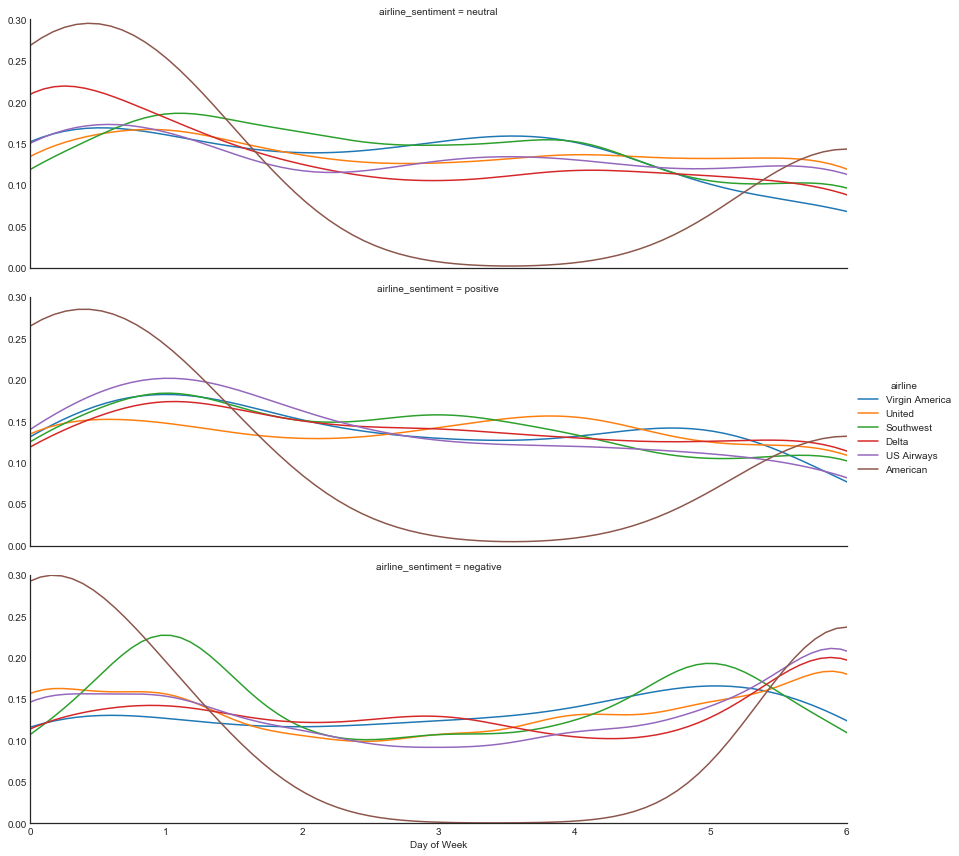

In [32]:

sns.set_style("white")
tweets['dow'] = tweets.tweet_created.dt.dayofweek

g = sns.FacetGrid(tweets, row = 'airline_sentiment', 
                 hue = 'airline', legend_out = True,
                 aspect = 3, size = 4)
g.map(sns.distplot, 'dow', hist = False)
g.add_legend()
g.axes.flat[0].set_xlim(0,6)
g.axes.flat[0].set_ylim(0,0.3)
g.axes.flat[2].set_xlabel('Day of Week')


plt.show()

# From top to bottom the different panels show neutral sentiment,positive sentiment, and negative sentiment. 
# Day of week 0 is Monday, while day of week 6 is a Sunday.
# show the change of sentiment during one week.

In [33]:
#visualization using wordcloud for the negative tweets
#using worldcloud

df=tweets[tweets['airline_sentiment']=='negative']
words = ' '.join(df['text'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'])


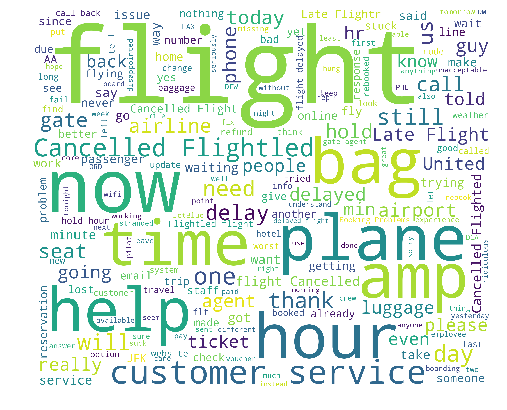

In [34]:
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='white',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)

plt.figure(1,figsize=(10, 7))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()


In [35]:
#visualization using wordcloud for the positive tweets

df=tweets[tweets['airline_sentiment']=='positive']
words = ' '.join(df['text'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'])

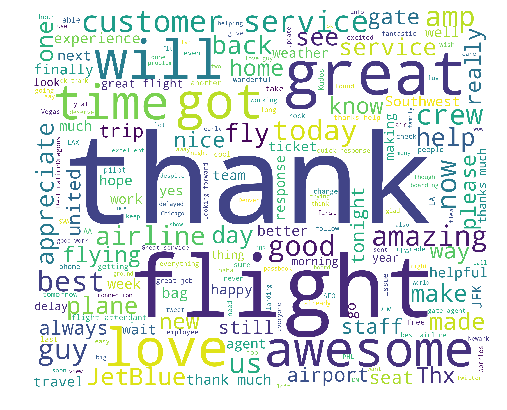

In [36]:
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='white',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)

plt.figure(1,figsize=(10, 7))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [37]:
#visualization using wordcloud for the neutral tweets
df=tweets[tweets['airline_sentiment']=='neutral']
words = ' '.join(df['text'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'])

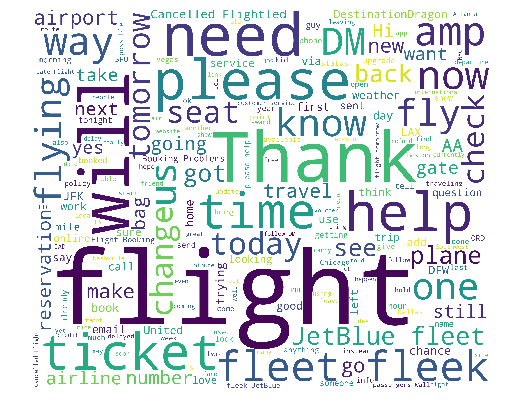

In [38]:
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='white',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)

plt.figure(1,figsize=(10, 7))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

### 2. The second part
In this part I search data through the Twitter API and map the tweets.

The modulde used is tweepy. In case I want to “keep the connection open”, and gather all the upcoming tweets about the topic I want to search, the streaming API is needed.
I need to extend the StreamListener() to customise the way I process the incoming data.




In [ ]:
# I use the following code to collect the data
# It will keep collecting data from twitter API
# the topic I tracked is 'Supermoon2017', I think this topic might be talked all over the world.
# I run it for around 5 days and the data I collected is save in'stream_supermoon2017.json'


import tweepy
from tweepy import Stream
from tweepy import OAuthHandler
from tweepy.streaming import StreamListener
import time
import argparse
import string
import json

def get_parser():
    """Get parser for command line arguments."""
    parser = argparse.ArgumentParser(description="Twitter Downloader")
    parser.add_argument("-q",
                        "--query",
                        dest="query",
                        help="Query/Filter",
                        default='-')
    parser.add_argument("-d",
                        "--data-dir",
                        dest="data_dir",
                        help="Output/Data Directory")
    return parser


class MyListener(StreamListener):
    """Custom StreamListener for streaming data."""

    def __init__(self, query):
        query_fname = format_filename(query)
        self.outfile = "stream_%s.json" % query_fname

    def on_data(self, data):
        try:
            with open(self.outfile, 'a') as f:
                f.write(data)
                print(data)
                return True
        except BaseException as e:
            print("Error on_data: %s" % str(e))
            time.sleep(5)
        return True

    def on_error(self, status):
        print(status)
        return True


def format_filename(fname):
    """Convert file name into a safe string.
    Arguments:
        fname -- the file name to convert
    Return:
        String -- converted file name
    """
    return ''.join(convert_valid(one_char) for one_char in fname)


def convert_valid(one_char):
    """Convert a character into '_' if invalid.
    Arguments:
        one_char -- the char to convert
    Return:
        Character -- converted char
    """
    valid_chars = "-_.%s%s" % (string.ascii_letters, string.digits)
    if one_char in valid_chars:
        return one_char
    else:
        return '_'

@classmethod
def parse(cls, api, raw):
    status = cls.first_parse(api, raw)
    setattr(status, 'json', json.dumps(raw))
    return status

consumer_key = "yFSMDH7qonDTMi0Ujp6VMBJLs"
consumer_secret = "7lAP1QECcJpkG1jZCpQXf3VnpR4xAbzRnsDwdcyfUWG2YAYxpR"
access_token = "935146442842361856-dGlWQhQ2DHtA3eFbOMSWuuHKVKWH9a3"
access_token_secret = "ZYQd5WcrKyjOci3rJRWVeCvK5PlW0LWQRyidfPpqKVF5d"

if __name__ == '__main__':
    # parser = get_parser()
    # args = parser.parse_args()
    auth = OAuthHandler(consumer_key, consumer_secret)
    auth.set_access_token(access_token, access_token_secret)
    api = tweepy.API(auth)

    twitter_stream = Stream(auth, MyListener("supermoon2017"))
    twitter_stream.filter(track=["supermoon2017"])

Then I change the data I collected into the format GeoJSON, because the format GeoJSON supports a variety of geometric types that can be used to visualise the desired shapes onto a map. For our examples, we just need the simplest structure, a Point. A point is identified by its coordinates (latitude and longitude).

The full data I collected is 76MB, but the doejson data is only 39KB, because only a small part of the tweets have information of location.


In [40]:
# In this step I translate the data I collect into GeoJSON
# and the GeoJSON data is collected in 'geo_data.json'

import json
with open('stream_supermoon2017.json', 'r') as f:
    geo_data = {
        "type": "FeatureCollection",
        "features": []
    }
    for line in f:
        tweet = json.loads(line)
        if tweet['coordinates']:
            geo_json_feature = {
                "type": "Feature",
                "geometry": tweet['coordinates'],
                "properties": {
                    "text": tweet['text'],
                    "created_at": tweet['created_at']
                }
            }
            geo_data['features'].append(geo_json_feature)
 
# Save geo data
with open('geo_data.json', 'w') as fout:
    fout.write(json.dumps(geo_data, indent=4))



In the next step I use Leaflet.js to realize tweets mapping.
Leaflet.js <http://leafletjs.com> is an open-source Javascript library for interactive maps.
I use it because I can create maps with tiles of your choice (e.g. from OpenStreetMap or MapBox), and overlap interactive components.

Then I use the following the code to creat a map, just following the titorial on the Leaflet.js website. And the final map is showing on the HTML. 

I haven't read all the tutorial on the website, but it shows a lot of possibilities, which might be useful in my following study.

   
 

![lavaux image](https://github.com/mmeagher/ARC6818-2017/blob/master/images/chenxiao_3.jpg)

![lavaux image](https://github.com/mmeagher/ARC6818-2017/blob/master/images/chenxiao_2.png)

In this link <http://localhost:5000/static/test.html> can see the map I made. I am not sure whether the pictures are available.

###  3. conclusion

 In this work what I found most difficult is searching twitter data myself, I spent much time working with the Twitter API. So I finally chose to let the computer searching the data and use the existing data to do the analysis.
 
 And about the data analysis, the most important thing I think is cleaning the data and using what I need from a lot of information.
 different plots can be used to realize data visualization, and it is also interesting to find different types of way to visualize the data.